### Preliminaries

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz
import json

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Access file
gohawks = "/content/drive/MyDrive/ECE_219_Project_4/tweets_#gohawks.txt"
gopatriots = "/content/drive/MyDrive/ECE_219_Project_4/tweets_#gopatriots.txt"
nfl = "/content/drive/MyDrive/ECE_219_Project_4/tweets_#nfl.txt"
patriots = "/content/drive/MyDrive/ECE_219_Project_4/tweets_#patriots.txt"
sb49 = "/content/drive/MyDrive/ECE_219_Project_4/tweets_#sb49.txt"
superbowl = "/content/drive/MyDrive/ECE_219_Project_4/tweets_#superbowl.txt"

### Question 9.1

In [4]:
def get_tweet_statistics(filename = str):

  # Read in txt file
  tweets = []
  with open(filename) as f:
      for line in f:
          tweets.append(line)

  # Keep track of hours, followers, and retweets
  hours = []
  followers = []
  retweets = []

  # Iterate through each line
  for line in tweets:
    tweet = json.loads(line)
    hours.append(tweet['citation_date'])
    followers.append(tweet['author']['followers'])
    retweets.append(tweet['metrics']['citations']['total'])

  # Get statistics
  num_tweets = len(hours)

  # Average number of tweets per hour
  print("Average number of tweets per hour: ", num_tweets / ((max(hours) - min(hours)) / 3600))

  # Average number of followers of users posting the tweets per tweet
  print("Average number of followers of users posting the tweets per tweet: ", sum(followers) / num_tweets)

  # Average number of retweets per tweet
  print("Average number of retweets per tweet: ", sum(retweets) / num_tweets)


In [5]:
get_tweet_statistics(gohawks)

Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877


In [6]:
get_tweet_statistics(gopatriots)

Average number of tweets per hour:  40.95469800606194
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078


In [7]:
get_tweet_statistics(nfl)

Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254


In [8]:
get_tweet_statistics(patriots)

Average number of tweets per hour:  750.89426460689
Average number of followers of users posting the tweets per tweet:  3280.4635616550277
Average number of retweets per tweet:  1.7852871288476946


In [9]:
get_tweet_statistics(sb49)

Average number of tweets per hour:  1276.8570598680474
Average number of followers of users posting the tweets per tweet:  10374.160292019487
Average number of retweets per tweet:  2.52713444111402


In [10]:
get_tweet_statistics(superbowl)

Average number of tweets per hour:  2072.11840170408
Average number of followers of users posting the tweets per tweet:  8814.96799424623
Average number of retweets per tweet:  2.3911895819207736


### Question 9.2

In [15]:
def tweets_per_hour(filename = str):

  # Read in txt file
  tweets = []
  with open(filename) as f:
      for line in f:
          tweets.append(line)

  # Keep track of hours
  hours = []

  # Iterate through each line
  for line in tweets:
    tweet = json.loads(line)
    hours.append(tweet['citation_date'])

  # Get tweets per hour
  # Initialize entire array first for efficiency
  tweets_per_hour = np.zeros(int((max(hours)-min(hours))/3600+1))
  start = min(hours)
  for i in hours:
      tweets_per_hour[int((i-start)/3600)] += 1

  # Use barplot
  # Get each hour
  x = np.linspace(0, len(tweets_per_hour)-1, len(tweets_per_hour))
  plt.bar(x, tweets_per_hour)
  plt.xlabel("Hour")
  plt.ylabel("Number of tweets")

  # If filename contains superbowl, make #superbowl the title
  if "superbowl" in filename:
    plt.title("#superbowl")
  elif "nfl" in filename:
    plt.title("#nfl")
  plt.show()

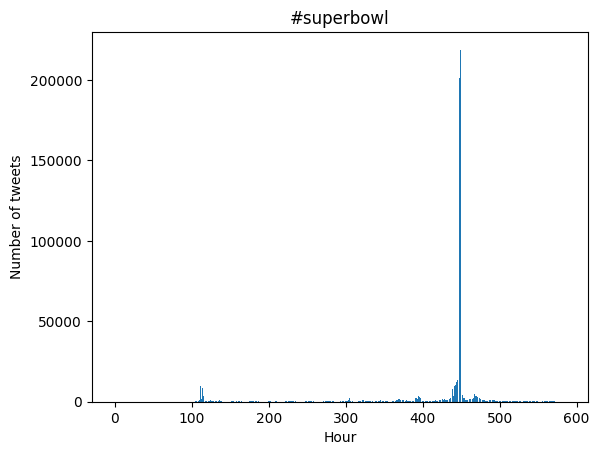

In [16]:
tweets_per_hour(superbowl)

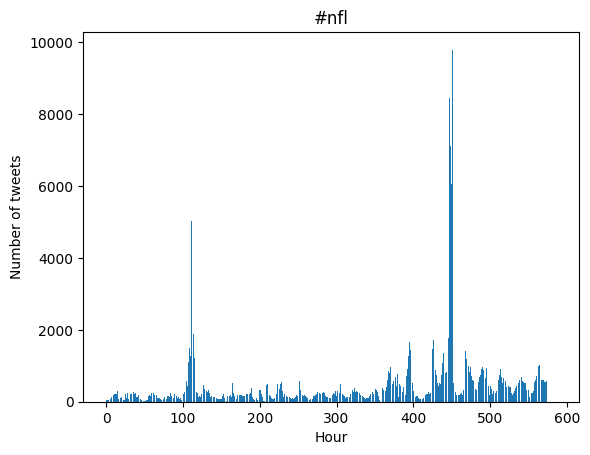

In [17]:
tweets_per_hour(nfl)